In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 16, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [ ]:
FILEPATH = "/content/cgm_to_meal.csv"
data = (pd.read_csv(FILEPATH, header=0))
data = data.dropna()
train_size = int(len(data) * 0.9)
test_size = len(data) - train_size
train_allData, test_allData = data.iloc[0:train_size], data.iloc[train_size:len(data)]
print(len(train_allData), len(test_allData))

35752 3973


In [ ]:
cgm_data = train_allData.cgm
# cgm_data_meal = train_allData(train_allData['meal'] == 1)]
cgm_data_no_meal = data[(data['meal'] == 0)]

# cgm_data_meal = cgm_data_meal.cgm
cgm_data_no_meal= cgm_data_no_meal.cgm
# print(cgm_data_no_meal)

In [ ]:
train_size_cgm = int(len(cgm_data_no_meal) * 0.8)
test_size_cgm = len(cgm_data_no_meal) - train_size_cgm
train_cgm_no_meal, test_cgm_no_meal = cgm_data_no_meal.iloc[0:train_size_cgm], cgm_data_no_meal.iloc[train_size_cgm:len(cgm_data_no_meal)]
print(len(train_cgm_no_meal), len(test_cgm_no_meal))



31139 7785


In [ ]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
time_steps = 1

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train_cgm_no_meal, train_cgm_no_meal, time_steps)
X_test, y_test = create_dataset(test_cgm_no_meal, test_cgm_no_meal, time_steps)


X_train= X_train.reshape(len(X_train), 1, 1)
X_test= X_test.reshape(len(X_test), 1, 1)


print(X_train.shape, y_train.shape)
# X_test, y_test = create_dataset(test, test.cgm, time_steps)




(31138, 1, 1) (31138,)


In [ ]:
model_cgm = keras.Sequential()
model_cgm.add(keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model_cgm.add(keras.layers.Dense(1))
model_cgm.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))
model_cgm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_cgm = model_cgm.fit(
    X_train, y_train, 
    epochs=100, 
    batch_size=32, 
    validation_split=0.1, 
    verbose=1, 
    shuffle=False
)

Epoch 1/100
876/876 [==============================] - 3s 3ms/step - loss: 189.5086 - val_loss: 111.0364
Epoch 2/100
876/876 [==============================] - 3s 3ms/step - loss: 183.7809 - val_loss: 129.5069
Epoch 3/100
876/876 [==============================] - 3s 3ms/step - loss: 180.8497 - val_loss: 131.7215
Epoch 4/100
876/876 [==============================] - 3s 3ms/step - loss: 177.1421 - val_loss: 134.6367
Epoch 5/100
876/876 [==============================] - 3s 3ms/step - loss: 173.8292 - val_loss: 135.9688
Epoch 6/100
876/876 [==============================] - 3s 3ms/step - loss: 171.0600 - val_loss: 136.4832
Epoch 7/100
876/876 [==============================] - 2s 3ms/step - loss: 168.7379 - val_loss: 136.1992
Epoch 8/100
876/876 [==============================] - 3s 3ms/step - loss: 166.6685 - val_loss: 134.1144
Epoch 9/100
876/876 [==============================] - 3s 3ms/step - loss: 164.5755 - val_loss: 130.7275
Epoch 10/100
876/876 [==============================] -

In [ ]:
y_pred = model_cgm.predict(X_test)

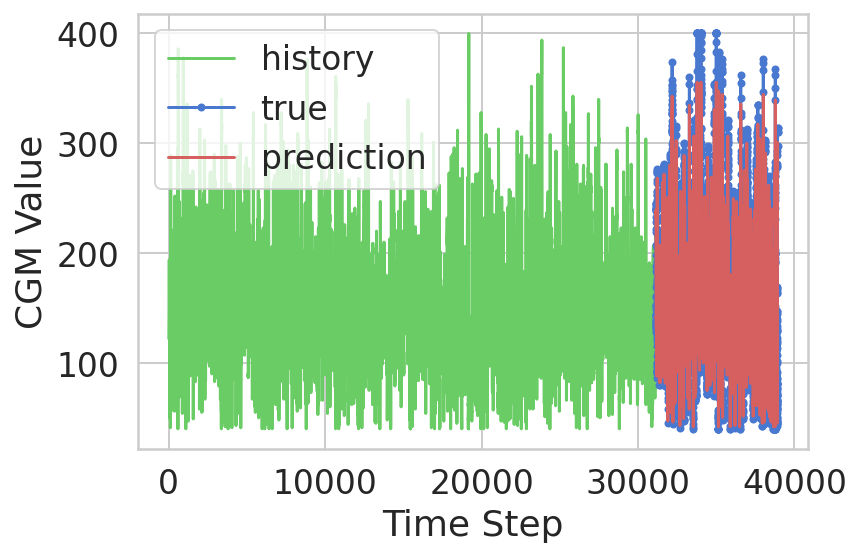

In [ ]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('CGM Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

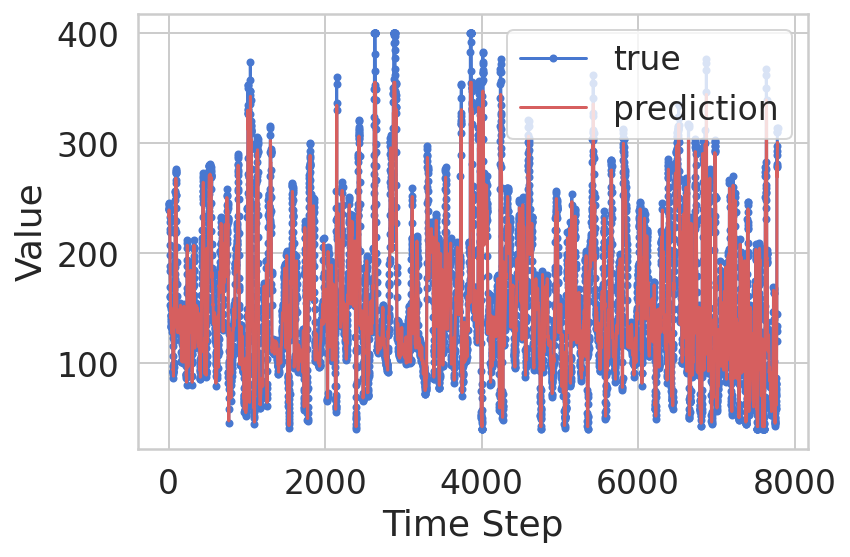

In [ ]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

SECOND PART

In [134]:
# print(test_allData)
# print("length of test data :", len(test_allData))

In [ ]:
test_allData.meal.value_counts()

0    3888
1      85
Name: meal, dtype: int64

In [132]:
cgm_test = test_allData.cgm
# print(cgm_test)
cgm_test = np.array(cgm_test).reshape(len(cgm_test), 1, 1)
cgm_predicted = model_cgm.predict(cgm_test)
# print(cgm_predicted)
# print(len(cgm_predicted))

In [133]:
cgm_actual = cgm_test.tolist()
test_meal_values = test_allData.meal
cgm_actual_flattened = []
for sublist in cgm_actual:
    for item in sublist:
        cgm_actual_flattened.append(item)
# print(cgm_actual_flattened)
# print(test_meal_values)
# print(len(cgm_actual_flattened), len(test_meal_values))


In [ ]:

cgm_predicted_copy= cgm_predicted.tolist()
print(len(cgm_predicted_copy), len(cgm_actual_flattened))
difference_list=[]
for i in range(len(cgm_predicted)-1):
  difference_list.append(cgm_predicted_copy[i][0]-cgm_actual_flattened[i+1][0])
print(difference_list)


3973 3973
[-1.31182861328125, -0.280120849609375, -1.215850830078125, -4.1831817626953125, -5.248138427734375, 0.656707763671875, -7.248138427734375, -3.4058074951171875, 4.563079833984375, -0.215850830078125, 3.849945068359375, -11.938934326171875, -11.280120849609375, -7.56170654296875, -6.721221923828125, -2.854278564453125, -0.854278564453125, 0.212982177734375, -0.6887969970703125, -4.62481689453125, -4.6887969970703125, 0.246063232421875, 0.34332275390625, 6.43829345703125, -3.280120849609375, -5.31182861328125, 1.5941925048828125, -2.280120849609375, -8.280120849609375, 0.531951904296875, -0.374603271484375, 3.68817138671875, 1.883544921875, -2.9759063720703125, -4.0120849609375, 5.9177093505859375, 0.21795654296875, -2.6973876953125, -5.74029541015625, -3.9011383056640625, 1.0240936279296875, 3.1375732421875, 3.3466949462890625, 3.5864944458007812, -0.13774871826171875, -1.0779571533203125, 1.9220428466796875, 0.11101531982421875, -7.822784423828125, -4.25262451171875, -7.41350

In [ ]:
test_meal_values= list(test_meal_values)
print(len(test_meal_values))
dic_differece = {}
for m, c in zip(test_meal_values, difference_list):
    dic_differece.setdefault(m, []).append(c)

print(dic_differece)

3973
{0: [-1.31182861328125, -0.280120849609375, -1.215850830078125, -4.1831817626953125, -5.248138427734375, 0.656707763671875, -7.248138427734375, -3.4058074951171875, 4.563079833984375, -0.215850830078125, 3.849945068359375, -11.938934326171875, -11.280120849609375, -7.56170654296875, -6.721221923828125, -2.854278564453125, -0.854278564453125, 0.212982177734375, -0.6887969970703125, -4.62481689453125, -4.6887969970703125, 0.246063232421875, 0.34332275390625, 6.43829345703125, -3.280120849609375, -5.31182861328125, 1.5941925048828125, -2.280120849609375, -8.280120849609375, 0.531951904296875, -0.374603271484375, 3.68817138671875, 1.883544921875, -2.9759063720703125, -4.0120849609375, 5.9177093505859375, 0.21795654296875, -2.6973876953125, -5.74029541015625, -3.9011383056640625, 1.0240936279296875, 3.1375732421875, 3.3466949462890625, 3.5864944458007812, -0.13774871826171875, -1.0779571533203125, 1.9220428466796875, 0.11101531982421875, -7.822784423828125, -4.25262451171875, -7.413505

In [ ]:
dic_differece[0]

In [ ]:
dic_differece[1]

In [ ]:
no_meal_difference = pd.DataFrame({'no_meal':dic_differece[0]})
meal_difference = pd.DataFrame({'meal':dic_differece[1]})

         meal
0    7.177353
1  -10.131210
2   -4.739731
3   -2.157242
4   -1.315483
..        ...
80   1.448181
81   0.753235
82   1.896248
83   0.896248
84   7.855789

[85 rows x 1 columns]


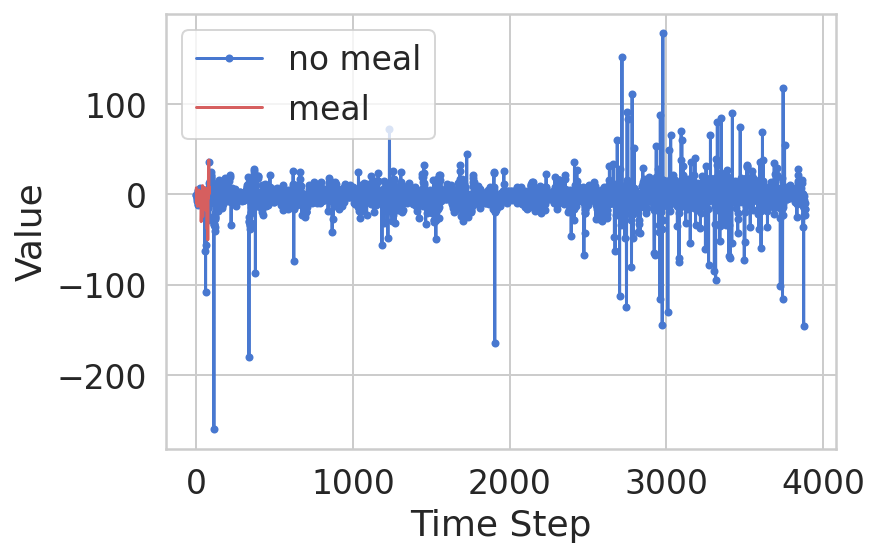

In [131]:
no_meal_rounded = [round(num, 4) for num in dic_differece[0]]

meal_rounded = [round(num, 4) for num in dic_differece[1]]

plt.plot(no_meal_rounded, marker='.', label="no meal")
plt.plot(meal_rounded, 'r', label="meal")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [ ]:
plot_difference = m

In [ ]:
dict_count_occurences_of_meal = {}

for val in meal_rounded:
    if val in dict_count_occurences_of_meal:
        dict_count_occurences_of_meal[val] += 1
    else:
        dict_count_occurences_of_meal[val] = 1

print(sorted(dict_count_occurences_of_meal.items(), key=lambda x: x[1], reverse=True))

[(-1.9, 3), (-2.2, 2), (-1.3, 2), (-2.6, 2), (-7.0, 2), (-5.2, 2), (-3.4, 2), (-1.0, 2), (-2.3, 2), (-1.7, 2), (1.9, 2), (-0.0, 2), (-3.8, 2), (7.2, 1), (-10.1, 1), (-4.7, 1), (-6.0, 1), (-13.4, 1), (2.1, 1), (-6.6, 1), (-6.7, 1), (-3.1, 1), (-6.1, 1), (4.8, 1), (3.0, 1), (-1.8, 1), (-0.2, 1), (2.6, 1), (1.7, 1), (-13.8, 1), (0.6, 1), (-30.3, 1), (-22.3, 1), (-3.2, 1), (3.2, 1), (2.3, 1), (-7.3, 1), (-8.7, 1), (9.6, 1), (-24.7, 1), (-8.0, 1), (-6.8, 1), (-0.7, 1), (-3.0, 1), (-3.5, 1), (7.5, 1), (1.0, 1), (-4.9, 1), (-4.8, 1), (-1.2, 1), (7.0, 1), (1.3, 1), (-1.6, 1), (-14.7, 1), (-18.2, 1), (-14.9, 1), (-12.5, 1), (-4.0, 1), (6.1, 1), (-38.5, 1), (-5.3, 1), (-1.5, 1), (-50.4, 1), (6.5, 1), (3.9, 1), (-4.5, 1), (38.0, 1), (1.4, 1), (0.8, 1), (0.9, 1), (7.9, 1)]


In [ ]:
dict_count_occurences_of_no_meal = {}

for val in no_meal_rounded:
    if val in dict_count_occurences_of_meal:
        dict_count_occurences_of_no_meal[val] += 1
    else:
        dict_count_occurences_of_no_meal[val] = 1

print(sorted(dict_count_occurences_of_no_meal.items(), key=lambda x: x[1], reverse=True))